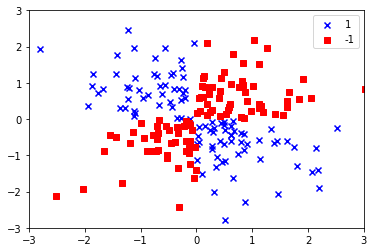

In [38]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1,
											1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor ==
											-1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

I prossimi due blocchi sono un modello lineare (ho provato il logistic regression) per dimostrare quanto schifo facciano i modelli lineari.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X_xor , y_xor , test_size = 0.3 , random_state=1 , stratify = y_xor)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0 , random_state = 1)
lr.fit(X_train_std , y_train)
y_pred = lr.predict(X_test_std)
print('Errori: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza %.2f' % accuracy_score(y_test , y_pred))

Errori: 25
Accuratezza 0.58


Ora invece uso un kernel non lineare per SVM così vediamo se riesco a separare tutto

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel ='rbf' , C=1.0 , random_state=0)
svm.fit(X_train_std , y_train)

SVC(random_state=0)

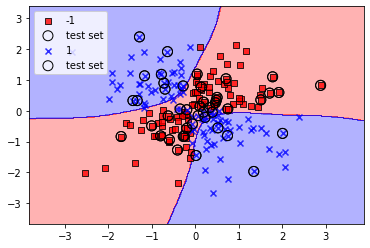

In [44]:
from funzioni_utili import plot_dec_reg
import numpy as np
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))
plot_dec_reg(X_combined_std , y_combined , classifier = svm, test_idx=range(105 , 150) )
plt.legend(loc='upper left')
plt.show()

Provo a fare diversi calcoli su diversi modlli per accuratezza. Comincio prima con quello normale

In [46]:
y_pred_svm = svm.predict(X_test_std)
print('Errori_test: %d' % (y_test != y_pred_svm).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza_test %.2f' % accuracy_score(y_test , y_pred_svm))

y_pred_svm_train = svm.predict(X_train_std)
print('Errori_train: %d' % (y_train != y_pred_svm_train).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza_train %.2f' % accuracy_score(y_train , y_pred_svm_train))

Errori_test: 10
Accuratezza_test 0.83
Errori_train: 11
Accuratezza_train 0.92
